In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#### 1. Data from video ####

In [58]:
data_file = "../lab_data/video_data/20230621.txt"
vid_data = np.loadtxt(data_file,unpack=True)
N = vid_data.shape[0]-1
tl, xl = np.vsplit(vid_data, [1])
tl = tl.reshape(-1)

poly_xl = [ np.polyfit(tl, x, 9) for x in xl ]
fxl = [ lambda t: np.polyval(px, t) for px in poly_xl ]
pxal = np.polyfit(tl, xl[0], 9)
fal = lambda t: np.polyval(pxal, t)

In [61]:
fxl[0] == fxl[1]

False

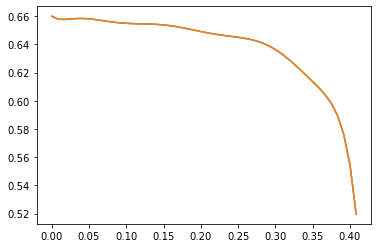

In [62]:
plt.plot(tl, fxl[0](tl), tl,fxl[1](tl));

#### 2. Numeric data ####

In [5]:
def rhs2(t, y, k, m, g, N):
    x, v = np.split(y, 2)
    xdot = v
    vdot = np.zeros_like(v)
    vdot[0] = -N*g + k/m * (x[1] - x[0])
    vdot[1:-1] = k/m * (x[2:] - 2*x[1:-1] + x[:-2])
    vdot[-1] = k/m * (x[-2] - x[-1])
    return np.hstack((xdot, vdot))

In [6]:
#Data from our springs and masses
L0 = 0.4639
KK = 0.4399
MM = 56.6E-3
g = 9.81

In [7]:
# Simple run
k = KK * (N - 1)
m = MM
x0 = np.zeros(N)
v0 = np.zeros(N)
y0 = np.hstack((x0, v0))
soluc = solve_ivp(rhs2, [0, 0.4], y0, args=[k, m, g, N], max_step=0.01)
tn = soluc.t
xn, vn = (np.vsplit(soluc.y, 2))

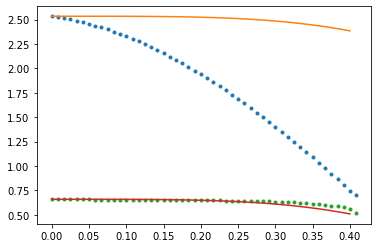

In [34]:
dt=0.05
dn=int(0.05/0.008)
plt.plot(tl, xl[0],'.', tn, xl[0,0]+xn[1], tl, xl[1], '.', tn, xv[1,0]+xn[1]);

In [20]:
tv.shape

(50,)

In [21]:
xv.shape

(2, 50)

In [23]:
xv[0,:-dn].shape

(44,)